In [47]:
import os
import h5py
import pylab
import numpy as np

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [49]:
time = np.arange(-5,11,1)

In [50]:
time

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [51]:
lnb_220={}
lnb_221={}

In [52]:
for t in time:
    if t<0:
        name = 'M'+str(-t)+'MS'
    else:
        name = str(t)+'MS'
    try:
        f220=h5py.File('./srate1024220/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_'+name+'-1126259200-400.hdf','r')
        f221=h5py.File('./srate1024220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_'+name+'-1126259200-400.hdf','r')
        lnb_220[t]=f220.attrs['log_evidence']
        lnb_221[t]=f221.attrs['log_evidence']
    except FileNotFoundError:
        pass

In [7]:
lnb_220

{-5: -450433.6518310725,
 -4: -450426.6405334651,
 -3: -450423.0873520074,
 -2: -450422.7666679662,
 -1: -450406.8296572849,
 0: -450399.98355683876,
 1: -450403.24034776265,
 2: -450397.90464952117,
 3: -450390.19419492484,
 5: -450390.83125442424,
 7: -450388.4123323995,
 8: -450388.66562513355,
 9: -450383.033085075,
 10: -450382.8671430955}

In [8]:
lnb_221

{-5: -450411.19007956167,
 -4: -450411.59524604527,
 -3: -450407.9648891999,
 -2: -450397.0335201099,
 -1: -450389.50916617963,
 0: -450393.6932195688,
 1: -450398.1970289579,
 2: -450397.3111039629,
 3: -450391.16659936676,
 5: -450391.60503642634,
 7: -450387.3997677675,
 8: -450388.70301570237,
 9: -450383.1163163007,
 10: -450382.9417107712}

In [9]:
x221,y221=zip(*lnb_221.items())
x220,y220 = zip(*lnb_220.items())

In [10]:
y221

(-450411.19007956167,
 -450411.59524604527,
 -450407.9648891999,
 -450397.0335201099,
 -450389.50916617963,
 -450393.6932195688,
 -450398.1970289579,
 -450397.3111039629,
 -450391.16659936676,
 -450391.60503642634,
 -450387.3997677675,
 -450388.70301570237,
 -450383.1163163007,
 -450382.9417107712)

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

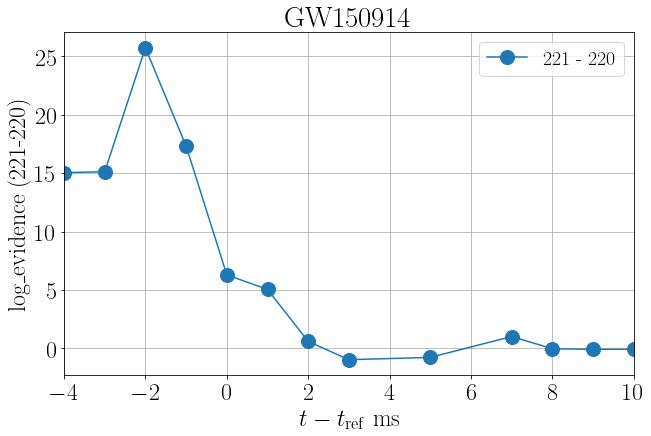

In [11]:
plt.plot(x221,np.array(y221)-np.array(y220),marker='o',label='221 - 220')
plt.legend()
plt.title('GW150914')
plt.ylabel('log$\_$evidence (221-220)')
plt.xlim(-4,10)
plt.xlabel('$t-t_\mathrm{ref}$ ms')
#plt.savefig('GW150914-overtones-difference.png',bbox_inches='tight')

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

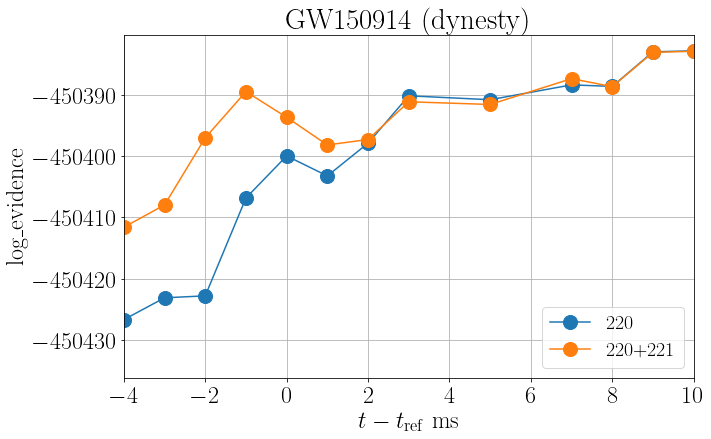

In [13]:
label=['220','220+221']
for i,dic in enumerate([lnb_220,lnb_221]):
    x,y=zip(*dic.items())
    plt.plot(x,y,label=label[i],marker='o')
plt.legend()
plt.title('GW150914 (dynesty)')
plt.ylabel('log$\_$evidence')
plt.xlim(-4,10)
plt.xlabel('$t-t_\mathrm{ref}$ ms')
#plt.savefig('GW150914-overtones.pdf',bbox_inches='tight')

# Zooming in the 2ms around the merger time

In [39]:
lnb_220 = {}
lnb_221 = {}
t =  np.linspace(-1.46,1.47,13)
def convert_th1(t,ra,dec):
    Det = detector.Detector('H1')
    delay = Det.time_delay_from_earth_center(ra,dec,t)
    return t+delay
for i in range(13):
    print(i)
    try:
        f220 = h5py.File('./cpnest-shortstride/srate1024220/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_'+str(i)+'-1126259200-400.hdf','r')
        f221 = h5py.File('./cpnest-shortstride/srate1024220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_'+str(i)+'-1126259200-400.hdf','r')
        th1 = convert_th1(f220.attrs['tref']+t[i]/1000,f220.attrs['ra'],f220.attrs['dec'])
        lnb_220[th1]=f220.attrs['log_evidence']
        lnb_221[th1]=f221.attrs['log_evidence']
    except FileNotFoundError:
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12


In [40]:
lnb_220

{1126259462.4222412: -450411.41009967093,
 1126259462.4224854: -450409.1677264587,
 1126259462.4227297: -450407.25363557826,
 1126259462.4229739: -450405.8363652562,
 1126259462.423218: -450401.746895214,
 1126259462.4234622: -450400.4014875579,
 1126259462.4237063: -450400.55229404185,
 1126259462.4239504: -450402.8154120675,
 1126259462.4241946: -450394.2109585977,
 1126259462.4244387: -450397.51293730485,
 1126259462.4246829: -450403.1965132186,
 1126259462.4249272: -450397.12486847513,
 1126259462.4251714: -450393.8246571484}

In [41]:
lnb_221

{1126259462.4222412: -450390.70445990283,
 1126259462.4224854: -450390.41708287393,
 1126259462.4227297: -450391.1004334683,
 1126259462.4229739: -450393.87075615994,
 1126259462.423218: -450390.70062357944,
 1126259462.4234622: -450391.83967432985,
 1126259462.4237063: -450395.03555617254,
 1126259462.4239504: -450397.78955401294,
 1126259462.4241946: -450393.72621731536,
 1126259462.4244387: -450396.47900756856,
 1126259462.4246829: -450399.32314036164,
 1126259462.4249272: -450396.4538294106,
 1126259462.4251714: -450394.82895095355}

In [42]:
lnb={}
for i in lnb_221:
    lnb[i] = lnb_221[i]-lnb_220[i]

In [43]:
x,y = zip(*lnb.items())

In [44]:
x

(1126259462.4222412,
 1126259462.4224854,
 1126259462.4227297,
 1126259462.4229739,
 1126259462.423218,
 1126259462.4234622,
 1126259462.4237063,
 1126259462.4239504,
 1126259462.4241946,
 1126259462.4244387,
 1126259462.4246829,
 1126259462.4249272,
 1126259462.4251714)

In [45]:
y

(20.70563976810081,
 18.750643584760837,
 16.153202109970152,
 11.965609096281696,
 11.04627163457917,
 8.561813228065148,
 5.516737869300414,
 5.025858054577839,
 0.48474128235829994,
 1.0339297362952493,
 3.8733728569350205,
 0.6710390645312145,
 -1.004293805162888)

In [46]:
np.savetxt('/work/yifan.wang/ringdown/GW150914/figs/pycbc_relamp221.txt',np.transpose([x,y]),
           header='rundir:/work/yifan.wang/ringdown/GW150914/cpnest-shortstride/\nt_H1 \t lnB')

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

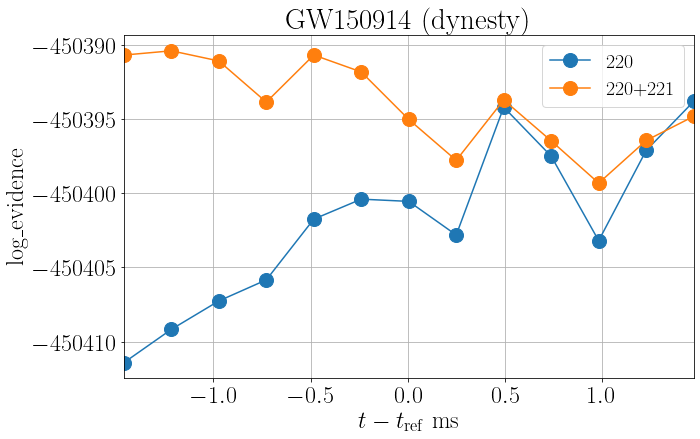

In [15]:
label=['220','220+221']
for i,dic in enumerate([lnb_220,lnb_221]):
    x,y=zip(*dic.items())
    plt.plot(x,y,label=label[i],marker='o')
plt.legend()
plt.title('GW150914 (dynesty)')
plt.ylabel('log$\_$evidence')
plt.xlim(t[0],t[-1])
plt.xlabel('$t-t_\mathrm{ref}$ ms')
#plt.savefig('GW150914-overtones.pdf',bbox_inches='tight')

In [16]:
from pycbc import detector
def maxl_det_time(path,det='L1'):
    f = h5py.File(path,'r')
    ii = np.argmax(f['samples']['loglikelihood'][:])
    delta_tc = f['samples']['delta_tc'][ii]
    tc = f.attrs['trigger_time'] + delta_tc 
    Det = detector.Detector(det)
    delay = Det.time_delay_from_earth_center(f['samples']['ra'][ii],
                                         f['samples']['dec'][ii],
                                         tc)
    f.close()
    return tc + delay

In [17]:
p = '/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/GW150914_095045-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf'
maxl_det_time(p,det='H1')

1126259462.4237013

Cotesta paper: t_Hanford = 1126259462.42323

# Therefore ours is ~0.5ms later than Cotesta's paper

In [17]:
filec = np.loadtxt('./figs/cotesta-B.txt')

# Starting time comparison

In [19]:
t_co = 1126259462.42323
t_ours = maxl_det_time(p,det='H1')

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

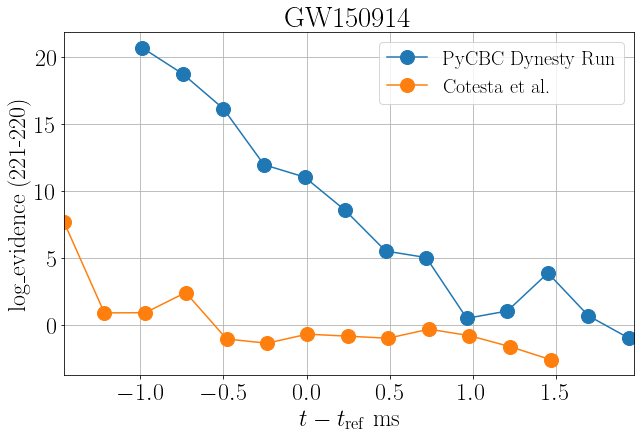

In [20]:
x221,y221=zip(*lnb_221.items())
x220,y220 = zip(*lnb_220.items())
plt.plot(x221+(t_ours - t_co)*1000,np.array(y221)-np.array(y220),marker='o',label='PyCBC Dynesty Run')
plt.plot(filec[:,0],np.log(filec[:,1]),marker='o',label='Cotesta et al.')
plt.legend()
#plt.plot(0,0.4,marker='o')
plt.title('GW150914')
plt.ylabel('log$\_$evidence (221-220)')
plt.xlim(t[0],t[-1]+0.5)
plt.xlabel('$t-t_\mathrm{ref}$ ms')

In [21]:
tc = 1126259462.4232266
Det = detector.Detector('H1')
delay = Det.time_delay_from_earth_center(1.1578762186634035,
                                         -1.191080211569962,
                                         tc)

tc + delay

1126259462.4336302

# Analyzing cpnest short stride results

In [22]:
f = h5py.File('./cpnest-shortstride/srate1024220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_4-1126259200-400.hdf','r')

In [23]:
f.attrs.keys()

<KeysViewHDF5 ['H1_analysis_segment', 'H1_likelihood_low_freq', 'H1_psd_segment', 'L1_analysis_segment', 'L1_likelihood_low_freq', 'L1_psd_segment', 'analyzed_detectors', 'approximant', 'dec', 'dlog_evidence', 'filetype', 'harmonics', 'lmns', 'log_evidence', 'model', 'ra', 'remapped_params', 'run_end_time', 'run_start_time', 'sampler', 'sampling_params', 'static_params', 'toffset', 'tref', 'variable_params']>

In [24]:
tc = f.attrs['tref'] + f.attrs['toffset']
Det = detector.Detector('H1')
delay = Det.time_delay_from_earth_center(f.attrs['ra'],
                                         f.attrs['dec'],
                                         tc)
tc + delay

1126259462.423218

This is the closest run to Costeta's 0ms run

In [54]:
f.attrs['log_evidence']

-450390.70062357944

# PyCBC Inference Model Analysis

In [67]:
from pycbc.inference import io, models

In [69]:
fp = io.loadfile('./cpnest-shortstride/srate1024220_221/4ogcringdown_output/samples_files/H1L1V1-INFERENCE_GW150914_4-1126259200-400.hdf','r')

cp = fp.read_config_file()
# the data
data = fp.read_data()
# the psds
psds = fp.read_psds()

In [70]:
# now let's load the model
model = models.read_from_config(cp, data=data, psds=psds)

# let's get the maximum likelihood point
samples = fp.read_samples(list(fp['samples'].keys()))
maxlidx = samples['loglikelihood'].argmax()
maxlparams = {p: samples[p][maxlidx] for p in model.variable_params}

In [71]:
# get the loglikelihood of these points
model.update(**maxlparams)
model.loglikelihood

-450372.4396413373

In [72]:
# get the matched-filter SNR
print((2*model.loglr)**0.5)

13.257409853687818


In [73]:
model.loglikelihood - model.loglr

-450460.31909935165